<a href="https://colab.research.google.com/github/Rambimo/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

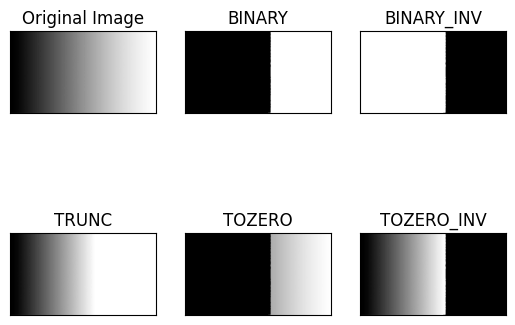

In [5]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/gradient.jpg', 0)  # Ubah 'path_to_image' sesuai dengan path gambar Anda

# Mendefinisikan nilai ambang
threshold_value = 170

# Mengaplikasikan thresholding dengan berbagai jenis
ret, binary_thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
ret, binary_inv_thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)
ret, trunc_thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TRUNC)
ret, tozero_thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO)
ret, tozero_inv_thresh = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO_INV)

# Menampilkan gambar hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary_thresh, binary_inv_thresh, trunc_thresh, tozero_thresh, tozero_inv_thresh]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


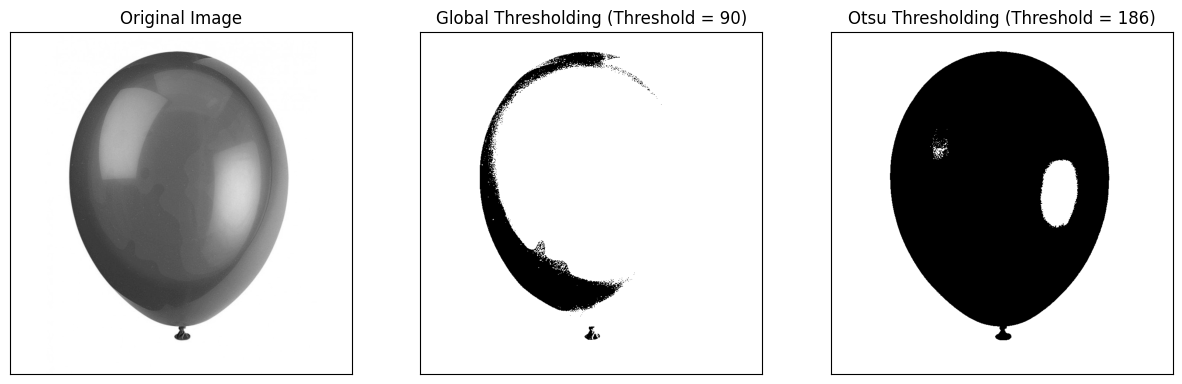

In [9]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/balloon.jpg', 0)  # Ubah 'balon.jpg' sesuai dengan nama gambar Anda

# Menerapkan global thresholding
global_threshold_value = 90
ret, global_result = cv2.threshold(img, global_threshold_value, 255, cv2.THRESH_BINARY)

# Menerapkan Otsu's thresholding
otsu_threshold, otsu_result = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
otsu_threshold = 186
ret, otsu_result = cv2.threshold(img, otsu_threshold, 255, cv2.THRESH_BINARY)

# Menampilkan citra asli, hasil global thresholding, dan hasil Otsu's thresholding
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(global_result, cmap='gray')
plt.title('Global Thresholding (Threshold = {})'.format(global_threshold_value))
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(otsu_result, cmap='gray')
plt.title('Otsu Thresholding (Threshold = {})'.format(otsu_threshold))
plt.xticks([]), plt.yticks([])

plt.show()

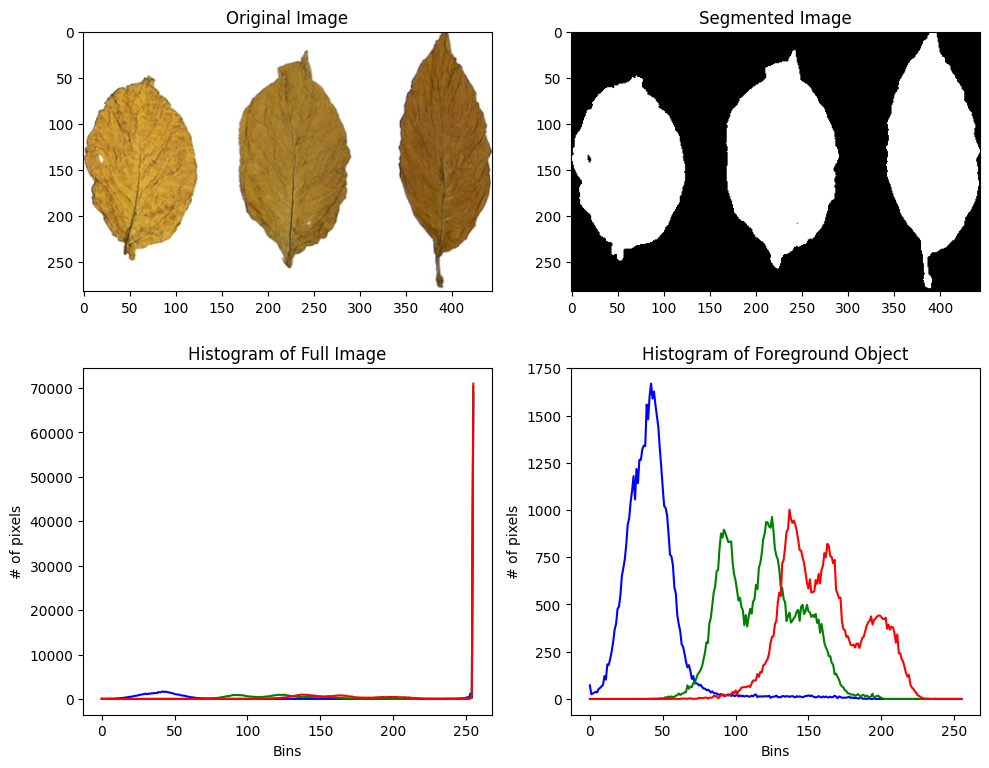

-1

In [23]:
# Load the original image
img = cv2.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')

# Apply your segmentation algorithm here and generate segmented_img
# Example thresholding segmentation
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, segmented_img = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Calculate histograms for the original and segmented image
hist_full = [cv2.calcHist([img], [i], None, [256], [0, 256]) for i in range(3)]
hist_mask = [cv2.calcHist([img], [i], segmented_img, [256], [0, 256]) for i in range(3)]

# Plotting the images and histograms
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Segmented Image
plt.subplot(2, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Segmented Image')

# Histogram for the full image
plt.subplot(2, 2, 3)
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    plt.plot(hist_full[i], color=col)
plt.title('Histogram of Full Image')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

# Histogram for the segmented image
plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    plt.plot(hist_mask[i], color=col)
plt.title('Histogram of Foreground Object')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

plt.tight_layout()
plt.show()
cv2.waitKey(0)

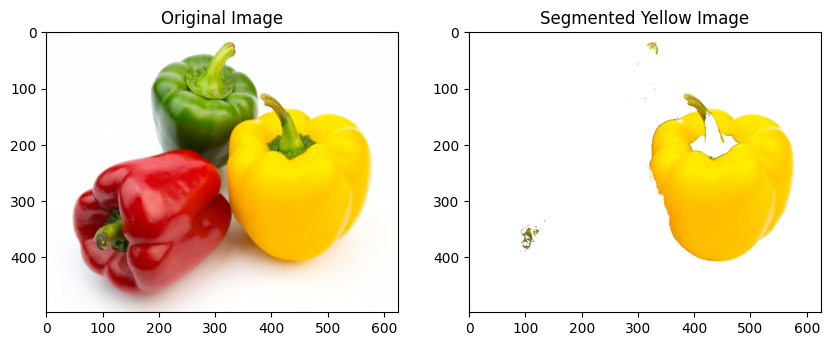

In [27]:
from sklearn.cluster import KMeans

# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/peppers.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Convert BGR to HSV
hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Define the lower and upper bounds for the yellow color in HSV
lower_yellow = np.array([20, 100, 100], dtype="uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

# Create a mask for yellow color in HSV
mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Apply the mask to the original image
result_image = cv2.bitwise_and(img, img, mask=mask_yellow)

# Convert non-yellow pixels to white
result_image[np.where(mask_yellow == 0)] = 255

# Display the original and segmented image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title('Segmented Yellow Image')

plt.show()